#### Question 7 -

Using the data from Question 4, write code to analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

### Insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#read the data from the given csv file
df = pd.read_csv("nasa_output.csv")
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,geolocation.coordinates,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,Point,"[6.08333, 50.775]",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,Point,"[10.23333, 56.18333]",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,Point,"[-113, 54.21667]",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,Point,"[-99.9, 16.88333]",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,Point,"[-64.95, -33.16667]",NaN,NaN


In [8]:
df.tail()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,geolocation.coordinates,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,Point,"[79.41667, 13.63333]",NaN,NaN
996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011-01-01T00:00:00.000,29.48195,-7.61123,Point,"[-7.61123, 29.48195]",NaN,NaN
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,Point,"[111.53333, -7.08333]",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,Point,"[106.58333, -6.66667]",NaN,NaN
999,Tomakovka,24019,Valid,LL6,600.0,Fell,1905-01-01T00:00:00.000,47.85000,34.76667,Point,"[34.76667, 47.85]",NaN,NaN


In [11]:
#we check is any null value present in
#data set or not
df["year"].isnull().sum()

1

In [13]:
# we found one missing value in data set so we can drop it
df = df.dropna(subset=["year"])

In [14]:
df["year"].isnull().sum()
type(df["year"])

pandas.core.series.Series

In [15]:
#We need to covert Series to datetime and extract just year from it
df["just_year"] = df["year"].apply(lambda x : str(x).split("T")[0].split("-")[0])

In [16]:
# Convert "just_year" column to integer type
df["just_year"] = df["just_year"].astype(int)

#### ● Get all the Earth meteorites that fell before the year 2000

In [17]:
# Filter meteorites that fell before the year 2000
meteroiets = df[df["just_year"] < 2000]

# Display insights about the filtered meteorites
print("Number of Earth meteorites that fell before the year 2000:", len(meteroiets))
print("Earliest year of Earth meteorites:", meteroiets["just_year"].min())
print("Latest year of Earth meteorites before year 2000:", meteroiets["just_year"].max())

Number of Earth meteorites that fell before the year 2000: 929
Earliest year of Earth meteorites: 861
Latest year of Earth meteorites before year 2000: 1999


#### Visuallization

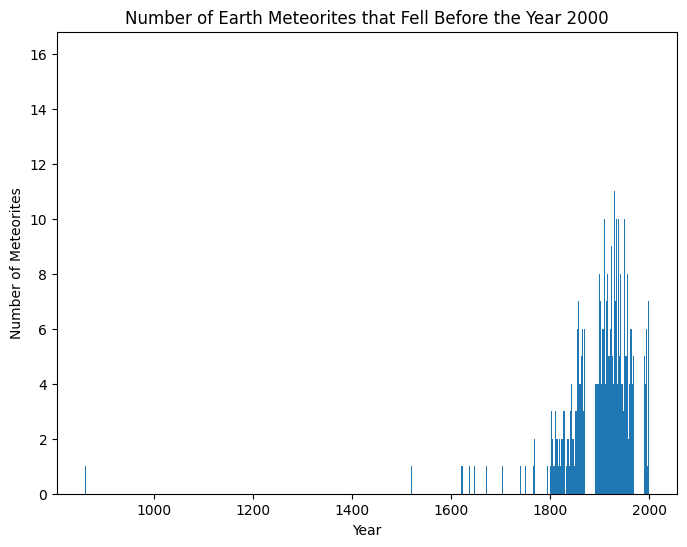

In [18]:
# Count the number of meteorites per year
meteorites_count = meteroiets["just_year"].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(meteorites_count.index, meteorites_count.values)
plt.xlabel("Year")
plt.ylabel("Number of Meteorites")
plt.title("Number of Earth Meteorites that Fell Before the Year 2000")
plt.show()

#### ● Get all the earth meteorites co-ordinates who fell before the year 1970

In [19]:
# Filter meteorites that fell before the year 1970
meteroiets_1970 = df[df["just_year"] < 1970]

# Select the latitude and longitude columns
coordinates = meteroiets_1970[["reclat", "reclong"]]

# Display the coordinates
print(coordinates)

       reclat    reclong
0    50.77500    6.08333
1    56.18333   10.23333
2    54.21667 -113.00000
4   -33.16667  -64.95000
5    32.10000   71.80000
..        ...        ...
994  54.50000   35.20000
995  13.63333   79.41667
997  -7.08333  111.53333
998  -6.66667  106.58333
999  47.85000   34.76667

[780 rows x 2 columns]


#### Visuallization


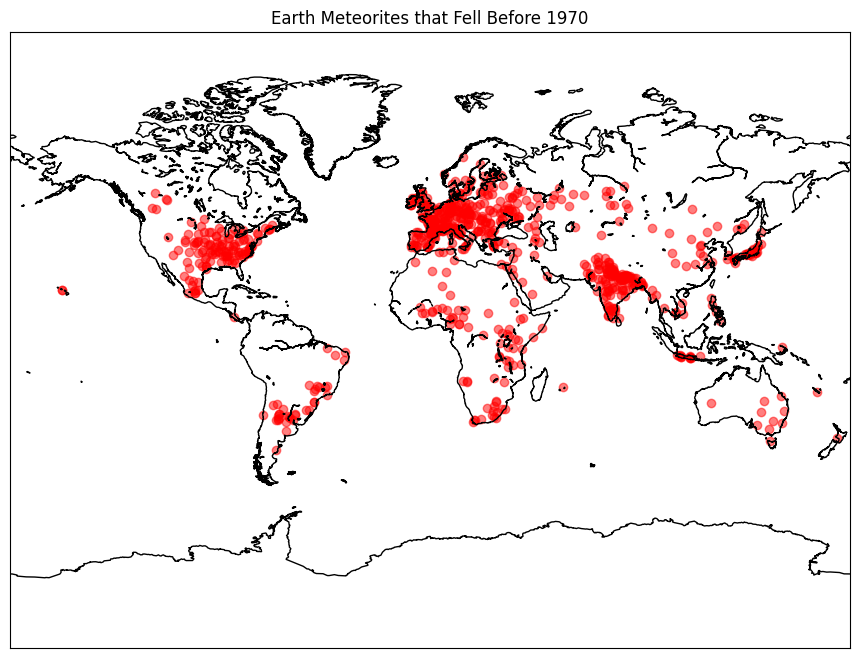

In [22]:
from mpl_toolkits.basemap import Basemap
# Extract latitude and longitude coordinates
latitude = meteroiets_1970["reclat"]
longitude = meteroiets_1970["reclong"]

# Create a map on dataset
plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
# Plot meteorite coordinates on the map
x, y = m(longitude.values, latitude.values)
m.scatter(x, y, marker='o', color='red', alpha=0.5)

plt.title("Earth Meteorites that Fell Before 1970")
plt.show()

#### ● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [23]:
# Filter meteorites with mass greater than 10,000 kg
meteorites_large_mass = df[df["mass"] > 10000]

# Display the filtered dataframe
print(f"There are {len(meteorites_large_mass)} meterorites whose mass is greater than 10000kg")

There are 243 meterorites whose mass is greater than 10000kg


In [24]:
meteorites_large_mass["name"]

2            Abee
7            Agen
11            Aïr
16        Akyumak
27     Alfianello
          ...    
991     Tieschitz
992        Tilden
994      Timochin
997         Tjabe
998      Tjerebon
Name: name, Length: 243, dtype: object

#### Visuallization

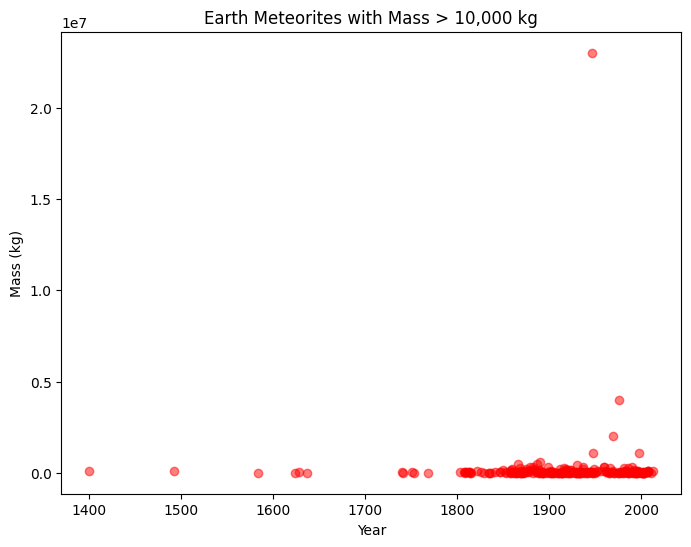

In [25]:
# Extract the mass and year columns
mass = meteorites_large_mass["mass"]
year = meteorites_large_mass["just_year"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(year, mass, color="red", alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Mass (kg)")
plt.title("Earth Meteorites with Mass > 10,000 kg")
plt.show()